In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import optimizers

In [7]:
df = pd.read_csv("/content/BankNote_Authentication.csv")

In [9]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [10]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [11]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [21]:
X_train.shape

(960, 4)

In [29]:
model = Sequential()
model.add(Dense(256, input_shape=(4,), activation='sigmoid'))
model.add(Dense(2, activation = 'softmax', name = 'output'))
opt = optimizers.Adam(lr = 0.01)
model.compile(optimizer=opt, loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               1280      
_________________________________________________________________
output (Dense)               (None, 2)                 514       
Total params: 1,794
Trainable params: 1,794
Non-trainable params: 0
_________________________________________________________________


In [31]:
history=model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
6/6 [==============================] - 1s 41ms/step - loss: 0.6937 - accuracy: 0.6261 - val_loss: 0.3385 - val_accuracy: 0.8698
Epoch 2/10
6/6 [==============================] - 0s 9ms/step - loss: 0.2618 - accuracy: 0.9094 - val_loss: 0.2133 - val_accuracy: 0.9062
Epoch 3/10
6/6 [==============================] - 0s 8ms/step - loss: 0.1329 - accuracy: 0.9605 - val_loss: 0.1280 - val_accuracy: 0.9635
Epoch 4/10
6/6 [==============================] - 0s 9ms/step - loss: 0.0961 - accuracy: 0.9697 - val_loss: 0.0708 - val_accuracy: 0.9792
Epoch 5/10
6/6 [==============================] - 0s 9ms/step - loss: 0.0549 - accuracy: 0.9900 - val_loss: 0.0533 - val_accuracy: 0.9896
Epoch 6/10
6/6 [==============================] - 0s 8ms/step - loss: 0.0494 - accuracy: 0.9866 - val_loss: 0.0338 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 0s 9ms/step - loss: 0.0396 - accuracy: 0.9936 - val_loss: 0.0238 - val_accuracy: 1.0000
Epoch 8/10
6/6 [=================

In [37]:
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred,axis=1)
y_pred_class

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,

In [38]:
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,y_pred_class)

array([[227,   5],
       [  0, 180]])

In [39]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


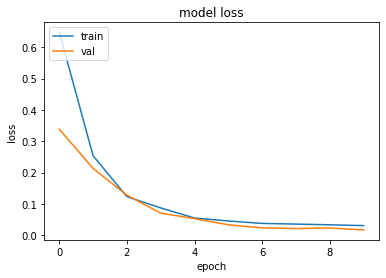

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

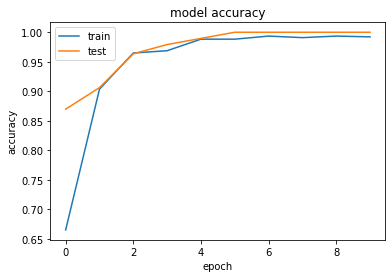

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

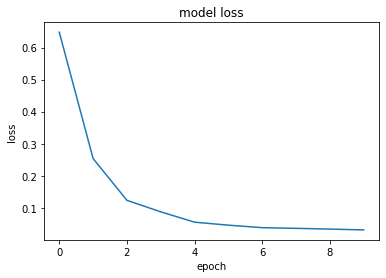

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
